# Data Classification using SVM

In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm

In [15]:
# preprocessing function
def preprocessing_data(df: pd.DataFrame):
    data = df.copy()
    # drop NaN values for some columns
    data = data.dropna(subset=['education_level','major_discipline', 'experience', 'last_new_job'])
    # Replace other NaN with Unknown value 
    data = data.replace(np.nan,'Unknown')
    # relevent_experience replace with 0 and 1, 1 for having experience and 0 for no experience
    data['relevent_experience'] = data['relevent_experience'].replace(['Has relevent experience','No relevent experience'],[1,0])

    # manually assign ordinal numbers to education_level and company_size
    # for graduate level I will give 1 and for master 2 and for phd 3. Graduate level can be equals to masters and phd but usually people with phd would not represent themselves as graduate. 
    # any graduate level certificate can be considered as graduate so I will assign a lower number to graduate than masters. 
    # for company_size unknown will get 0.
    
    data['education_level'] = data['education_level'].replace(['Graduate','Masters','Phd'],[1,2,3])
    data['company_size'] = data['company_size'].replace(['Unknown','<10', '10/49','50-99', '100-500','500-999','1000-4999','5000-9999','10000+'] ,range(0,9))

    # convert experience and last_new_job to numeric values
    data['experience'] = data['experience'].str.replace('>','').str.replace('<','')
    data['experience'] = pd.to_numeric(data['experience'])

    data['last_new_job'] = data['last_new_job'].str.replace('>','')
    data['last_new_job'] = data['last_new_job'].replace('never',0)
    data['last_new_job'] = pd.to_numeric(data['last_new_job'])

    data = pd.get_dummies(data, columns = ['company_type', 'enrolled_university', 'gender', 'major_discipline','city'])
    
    #Normalize data using MinMaxScaler function of sci-kit leaern
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data_scaled = pd.DataFrame(x_scaled, columns = data.columns)
    return(data_scaled)

In [16]:
raw_data =  pd.read_csv("aug_train.csv")
processed_data = preprocessing_data(raw_data)

In [17]:
y = processed_data.target
y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
16002    0.0
16003    0.0
16004    1.0
16005    1.0
16006    0.0
Name: target, Length: 16007, dtype: float64

In [18]:
X = processed_data.drop(columns='target')
X

,enrollee_id,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,company_type_Early Stage Startup,company_type_Funded Startup,...,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99
0,0.268051,0.942116,1.0,0.0,1.000000,0.000,0.25,0.104478,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890497,0.654691,0.0,0.0,0.736842,0.375,1.00,0.137313,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.346306,0.351297,0.0,0.0,0.210526,0.000,0.00,0.244776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.995836,0.680639,0.0,0.0,0.000000,0.000,0.00,0.152239,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019893,0.636727,1.0,0.5,1.000000,0.375,1.00,0.020896,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,0.968033,0.942116,1.0,0.0,0.473684,0.500,0.75,0.065672,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16003,0.891366,0.942116,1.0,0.0,0.315789,0.250,0.25,0.071642,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16004,0.221224,0.858283,0.0,0.0,0.684211,0.000,0.25,0.122388,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16005,0.940620,0.942116,1.0,0.0,0.684211,0.000,1.00,0.152239,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# split test-train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model train dataset usint SVM

model = svm.SVC(C= 1, gamma= 0.001, kernel= 'rbf', random_state=42) 
model.fit(X_train,y_train)

# predicting the y value 
y_pred = model.predict(X_test)

# Evaluating our model using confusion matrix
conf = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix: \n", conf)

# Evaluating our model using accuracy
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy: ", acc)



Confusion Matrix: 
 [[2353    0]
 [ 849    0]]

Accuracy:  0.7348532167395377


# Use GridSearchCV to find the best model

In [20]:
# Use GridSearchCV to optimize the model's hyperparameters (C, gamma, kernel)

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear', 'poly']} 

# refits the estimator using the best found parameters
new_model = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=3) 
new_model.fit(X_train,y_train)

# print refined parameters and estimators
print("\nWhich parameters gave the best model? ",new_model.best_params_)
print("\nWhich estimator gave the best model? ",new_model.best_estimator_)

# predicting the y value 
grid_preds = new_model.predict(X_test)

# Evaluating our model using confusion matrix
new_conf = confusion_matrix(y_test,grid_preds)
print("\nConfusion Matrix: \n", new_conf)

# Evaluating our model using accuracy
new_acc = accuracy_score(y_test,grid_preds)
print("\nAccuracy: ", new_acc)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=  16.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=  14.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=  14.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=  14.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=  14.5s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=   6.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   6.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.777 total time=   6.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.772 total time=   6.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.782 total time=   6.3s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.786 total time=  16.9s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

KeyboardInterrupt: 

As I saw that accuracy of training hyperparameters is decreasing and the runtime is increasing drastically I halted the trainig after C=10, gamma=1, kernel=poly;, score=0.718 total time=14.0min

In [21]:
# Use GridSearchCV to optimize the model's hyperparameters (C, gamma, kernel)

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear', 'poly']} 

# refits the estimator using the best found parameters
new_model = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=3) 
new_model.fit(X_train,y_train)

# print refined parameters and estimators
print("\nWhich parameters gave the best model? ",new_model.best_params_)
print("\nWhich estimator gave the best model? ",new_model.best_estimator_)

# predicting the y value 
grid_preds = new_model.predict(X_test)

# Evaluating our model using confusion matrix
new_conf = confusion_matrix(y_test,grid_preds)
print("\nConfusion Matrix: \n", new_conf)

# Evaluating our model using accuracy
new_acc = accuracy_score(y_test,grid_preds)
print("\nAccuracy: ", new_acc)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.772 total time=  16.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=  17.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=  17.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.760 total time=  17.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=  16.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=  12.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=  11.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.777 total time=   6.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.772 total time=   7.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.782 total time=   7.5s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.786 total time=  24.8s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

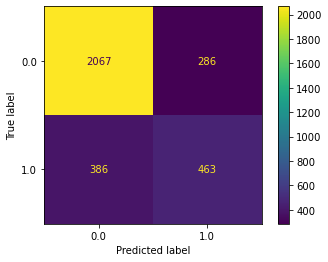

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# split test-train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model train dataset usint SVM

model = svm.SVC(C= 1, gamma= 0.1, kernel= 'rbf', random_state=42) 
model.fit(X_train,y_train)

plot_confusion_matrix(model, X_test, y_test)  
plt.show()

# Eliminate city feature 

In [24]:
# preprocessing function
def preprocessing_data_ver2(df: pd.DataFrame):
    data = df.copy()
    # drop NaN values for some columns
    data = data.dropna(subset=['education_level','major_discipline', 'experience', 'last_new_job'])
    # Replace other NaN with Unknown value 
    data = data.replace(np.nan,'Unknown')
    # relevent_experience replace with 0 and 1, 1 for having experience and 0 for no experience
    data['relevent_experience'] = data['relevent_experience'].replace(['Has relevent experience','No relevent experience'],[1,0])

    # manually assign ordinal numbers to education_level and company_size
    # for graduate level I will give 1 and for master 2 and for phd 3. Graduate level can be equals to masters and phd but usually people with phd would not represent themselves as graduate. 
    # any graduate level certificate can be considered as graduate so I will assign a lower number to graduate than masters. 
    # for company_size unknown will get 0.
    
    data['education_level'] = data['education_level'].replace(['Graduate','Masters','Phd'],[1,2,3])
    data['company_size'] = data['company_size'].replace(['Unknown','<10', '10/49','50-99', '100-500','500-999','1000-4999','5000-9999','10000+'] ,range(0,9))

    # convert experience and last_new_job to numeric values
    data['experience'] = data['experience'].str.replace('>','').str.replace('<','')
    data['experience'] = pd.to_numeric(data['experience'])

    data['last_new_job'] = data['last_new_job'].str.replace('>','')
    data['last_new_job'] = data['last_new_job'].replace('never',0)
    data['last_new_job'] = pd.to_numeric(data['last_new_job'])

    data = pd.get_dummies(data, columns = ['company_type', 'enrolled_university', 'gender', 'major_discipline'])
    
    #Eliminate City feature
    data = data.drop(columns = 'city')
    
    #Normalize data using MinMaxScaler function of sci-kit leaern
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data_scaled = pd.DataFrame(x_scaled, columns = data.columns)
    return(data_scaled)

In [25]:
processed_data_ver2 = preprocessing_data_ver2(raw_data)

In [26]:
y1 = processed_data_ver2.target
X1 = processed_data_ver2.drop(columns='target')

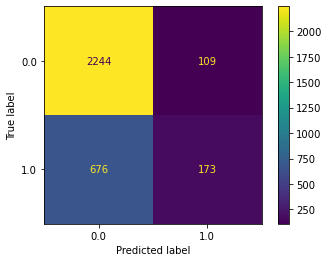


Accuracy:  0.754840724547158


In [35]:
import matplotlib.pyplot as plt
# split test-train data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# model train dataset usint SVM

model = svm.SVC(C= 1, gamma= 0.1, kernel= 'rbf', random_state=42) 
model.fit(X_train,y_train)

plot_confusion_matrix(model, X_test, y_test)  
plt.show()

y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy: ", acc)

# add class_weight

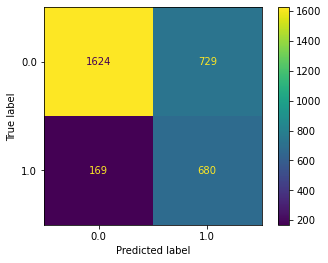


Accuracy:  0.7195502810743285


In [37]:
import matplotlib.pyplot as plt
# split test-train data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# model train dataset usint SVM

model1 = svm.SVC(C= 1, gamma= 0.1, kernel= 'rbf',class_weight={1: 3}, random_state=42) 
model1.fit(X_train,y_train)

plot_confusion_matrix(model1, X_test, y_test)  
plt.show()

y_pred = model1.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy: ", acc)

# class_weight without eliminating any feature 

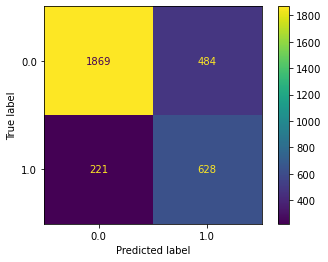


Accuracy:  0.7798251093066834


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

X = processed_data.drop(columns='target')
y =  processed_data.target
# split test-train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model train dataset usint SVM

model = svm.SVC(C= 1, gamma= 0.1, kernel= 'rbf',class_weight={1: 3}, random_state=42) 
model.fit(X_train,y_train)

plot_confusion_matrix(model, X_test, y_test)  
plt.show()

y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy: ", acc)